In [1]:
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
from hydro_opt import hydro_opt

In [2]:
base_case = hydro_opt()

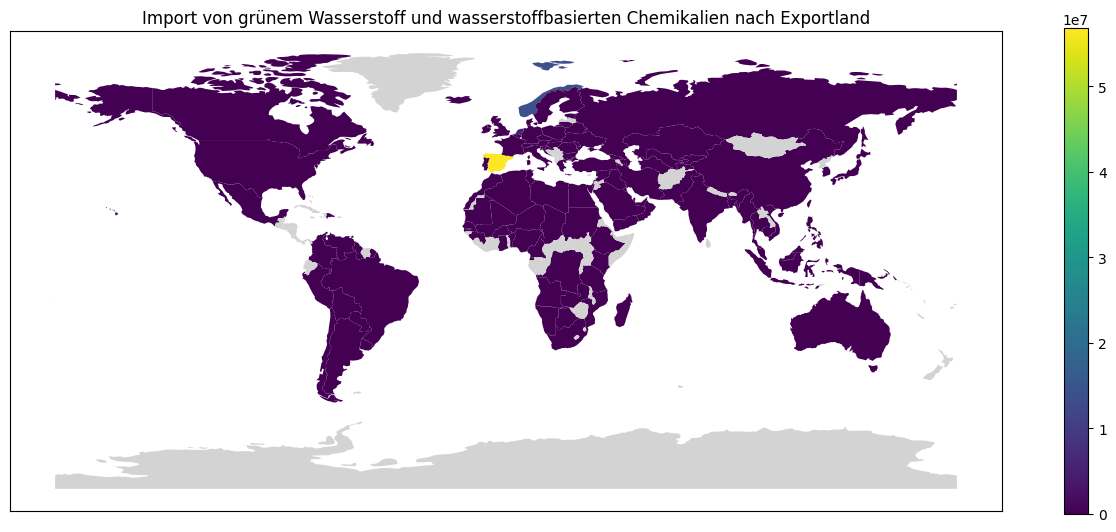

In [3]:
# Initialisieren des Modells mit Standardparametern
base_case = hydro_opt()
# Optimierung des Modells
base_case.optimize()
# beispielhafter Zugriff auf die abgespeicherten Ergebnisse als pandas DataFrame
results = base_case.results_df
# Abspeichern der Ergebnisse als csv mit deutschen Dezimaltrennzeichen
results.to_csv("Ergebnisse.csv", sep=";", decimal=",")
# Visualisierng des Modells
base_case.visualize()

In [4]:
base_case_opt = base_case.optimize(return_model=True, return_as_df=True)

ERROR: Unable to clone Pyomo component attribute. Component 'obj' contains an
uncopyable field '_init_sense' (<class
'pyomo.core.base.initializer.ConstantInitializer'>).  Setting field to `None`
on new object


In [5]:
#base_case_opt.to_csv("Ergebnisse Basis Szenario.csv", sep=";", decimal=",")
base_case_opt

,H2 Schiff,H2 Pipeline,H2 zu NH3 Schiff,H2 zu NH3 Pipeline,H2 für NH3 Umwandlung,H2 zu CH3OH Schiff,H2 zu CH3OH Pipeline,H2 für CH3OH Umwandlung,H2 für Umwandlung,H2 Import,NH3 Schiff,NH3 Pipeline,NH3 Import,CH3OH Schiff,CH3OH Pipeline,CH3OH Import,Gesamter Import
Code,,,,,,,,,,,,,,,,,
DZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.0f}'.format
base_case_opt.loc[["DZ", "AO", "AR", "NO"]]

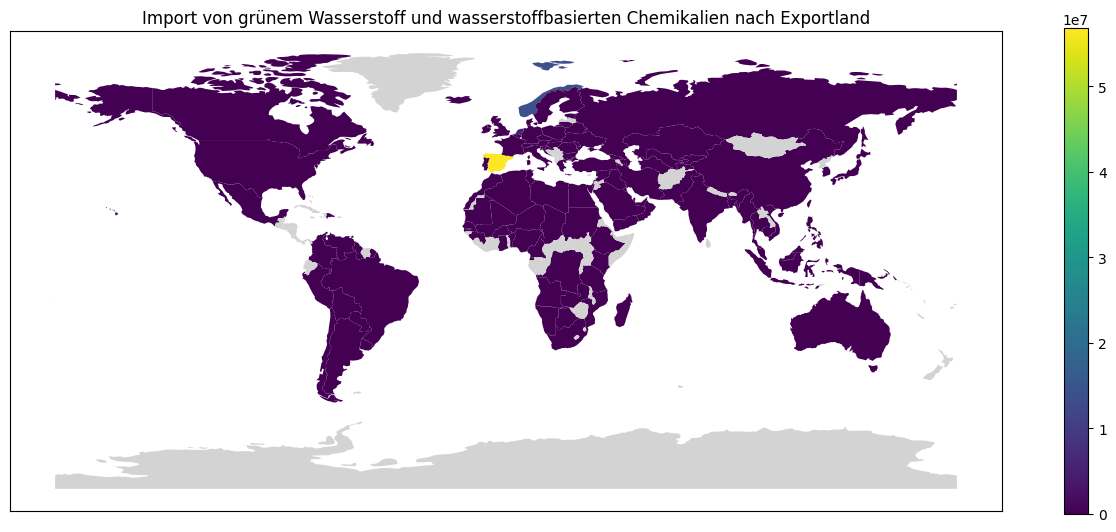

In [6]:
base_case.visualize()
#plt.savefig("Basis Szenario - Alles")

base_case.visualize(vis_style="bar")
plt.savefig("Basis Szenario - Alles - Bar")

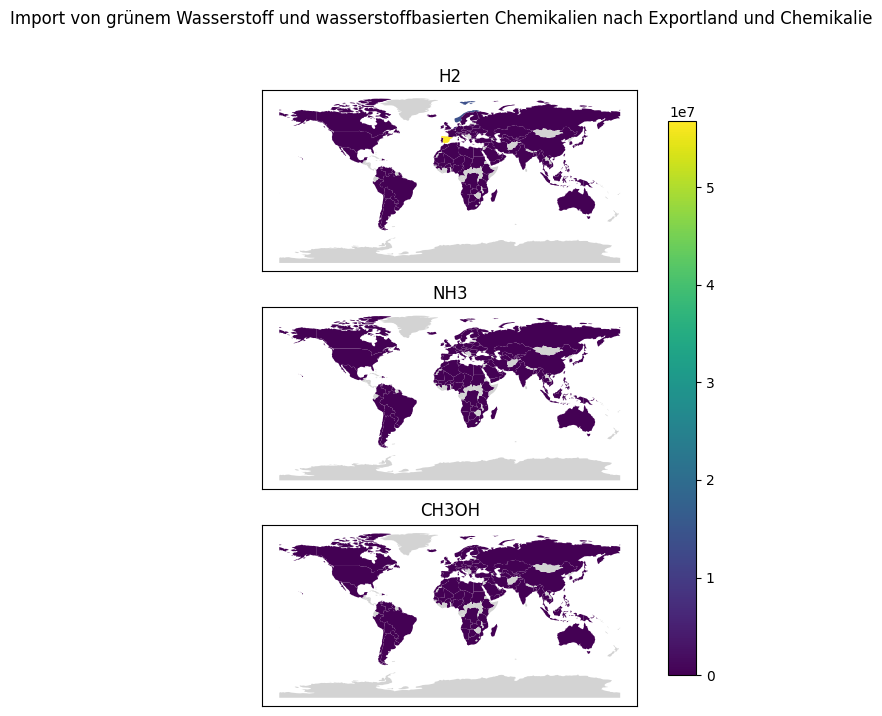

In [7]:
base_case.visualize(what="commodities", figsize=(8,8))
#plt.savefig("Basis Szenario - Chemikalien")

base_case.visualize(what="commodities", vis_style="bar", figsize=(8,8))
plt.savefig("Basis Szenario - Chemikalien - Bar")

base_case.visualize(what="hydrogen_conversion")
plt.savefig("Basis Szenario - Wasserstoff Detail")

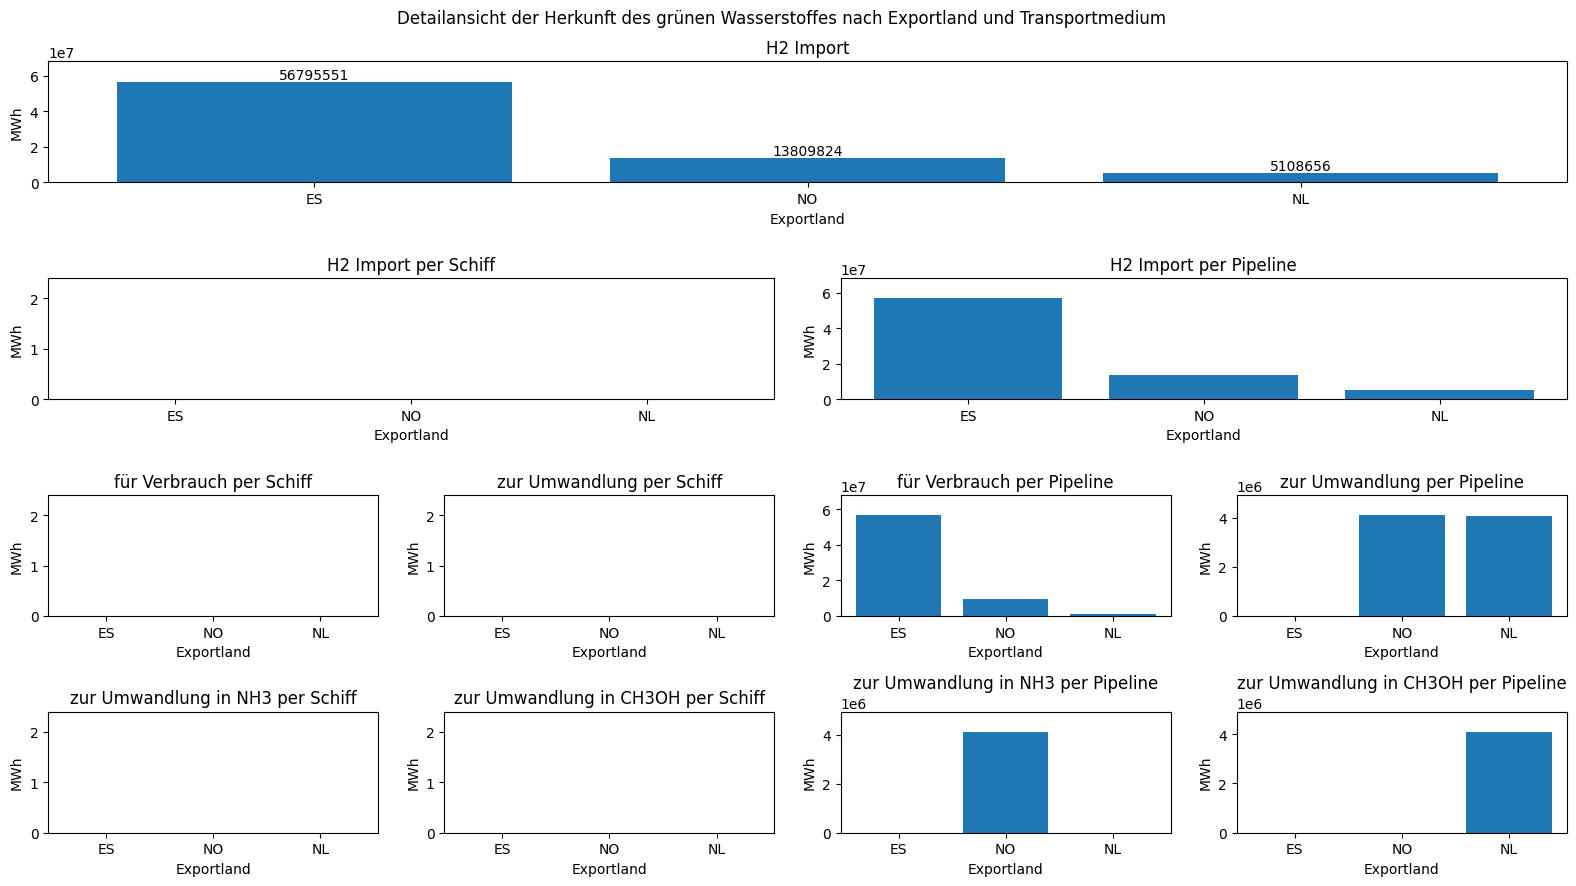

In [8]:
base_case.visualize(what="hydrogen_conversion", vis_style="bar")
#plt.savefig("Basis Szenario - Wasserstoff Detail - Bar")

In [9]:
base_case_import_limit = hydro_opt(use_import_limits=True)

In [10]:
base_case_import_limit_opt = base_case_import_limit.optimize(return_model=True)

ERROR: Unable to clone Pyomo component attribute. Component 'obj' contains an
uncopyable field '_init_sense' (<class
'pyomo.core.base.initializer.ConstantInitializer'>).  Setting field to `None`
on new object


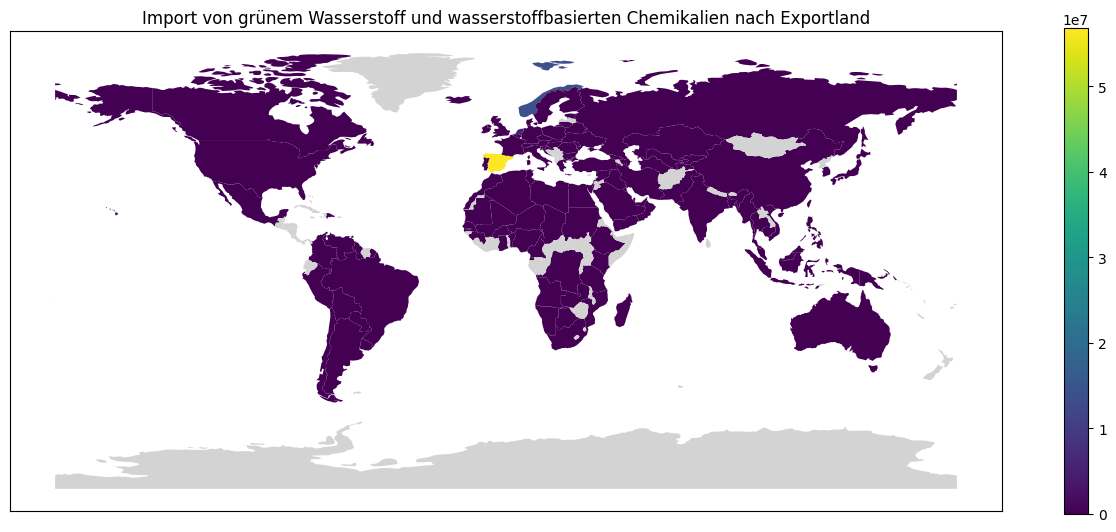

In [11]:
base_case_import_limit.visualize()

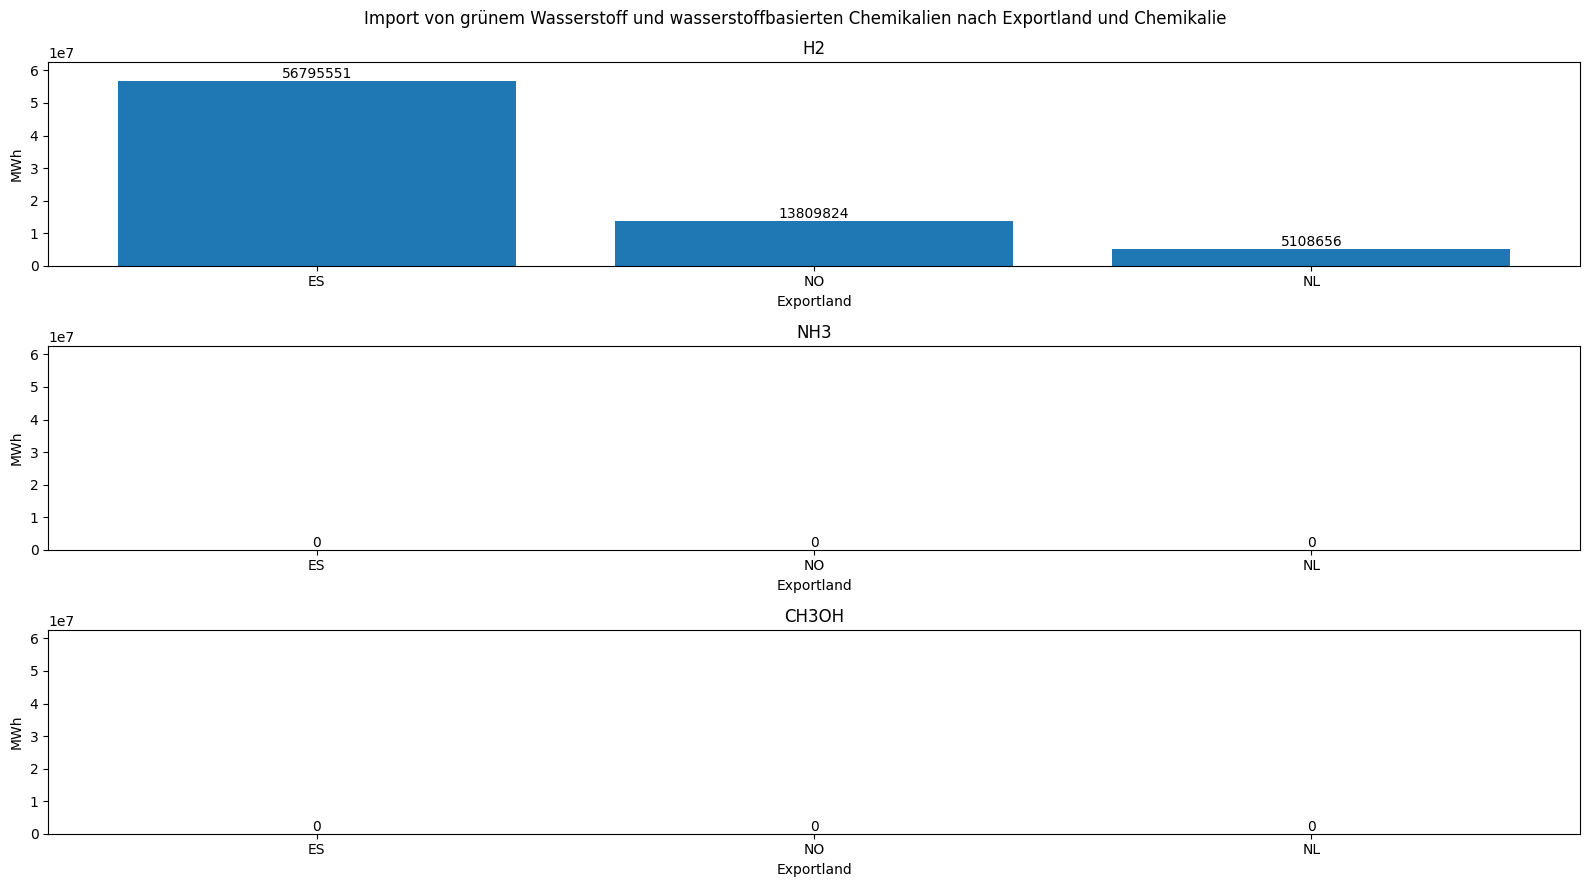

In [12]:
base_case_import_limit.visualize(what = "commodities", vis_style = "bar")

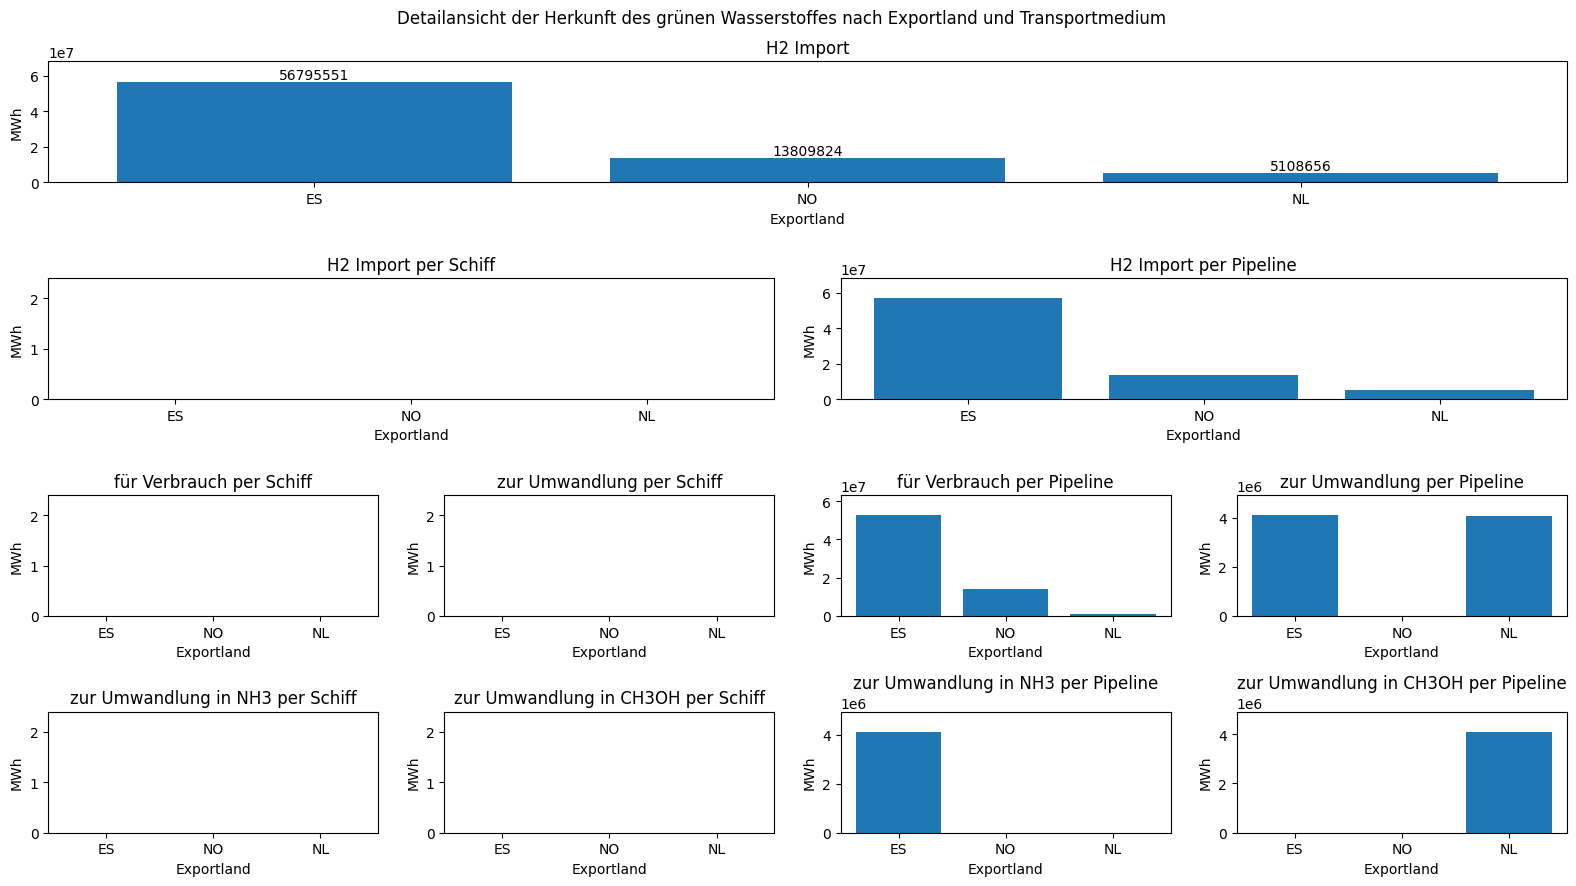

In [13]:
base_case_import_limit.visualize(what="hydrogen_conversion", vis_style="bar")